In [94]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_heatmap(arquivo,posicao): 
    sns.heatmap(pd.read_csv(arquivo), cmap="PiYG", center=0, ax=posicao).set(title=arquivo)
    
def plotar_sequencia(titulo,arquivo1,arquivo2,arquivo3): 
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(18, 4))

    fig.suptitle(titulo)

    plotar_heatmap(arquivo1,ax1)
    plotar_heatmap(arquivo2,ax2)
    plotar_heatmap(arquivo3,ax3)

<h2>DoS detectados como Normais</h2>

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

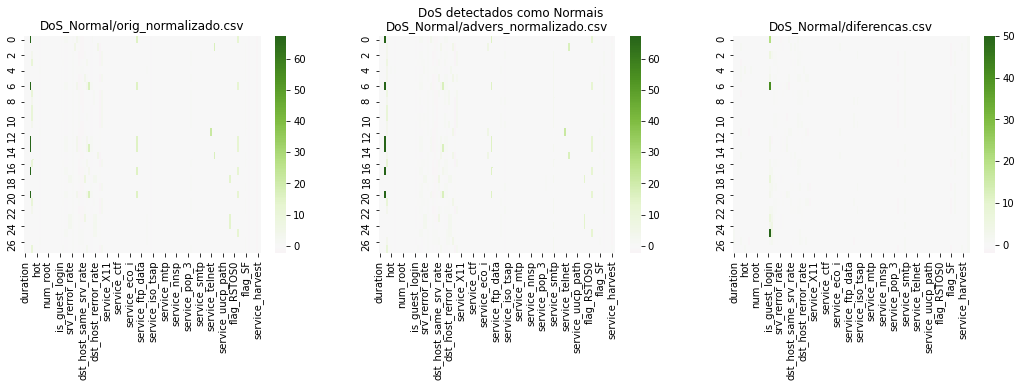

In [95]:
plotar_sequencia("DoS detectados como Normais",
                 "DoS_Normal/orig_normalizado.csv",
                 "DoS_Normal/advers_normalizado.csv",
                 "DoS_Normal/diferencas.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

[Text(0.5, 1.0, 'Total de Diferenças')]

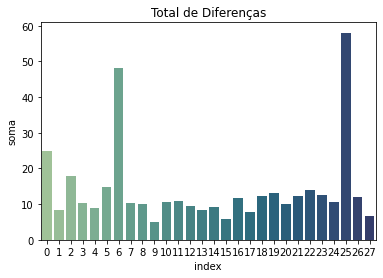

In [96]:
df = pd.read_csv("DoS_Normal/diferencas.csv")
df = df[df.columns].apply(abs)
df["soma"] = df[df.columns].sum(axis=1)

sns.barplot(x="index", y="soma", data=df.reset_index(), palette = 'crest').set(title="Total de Diferenças")

Calculos uma média da soma das diferenças:

In [97]:
df["soma"].mean()

14.077325878223771

Separo as amostras mais diferentes que a média.

In [98]:
acima_media = df["soma"] >  df["soma"].mean()
df_acima_media = df[acima_media]
df_acima_media = df_acima_media.drop(["soma"], axis=1)
df_acima_media

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_http_8001,service_http_2784,service_urh_i,service_aol,service_harvest,service_red_i,y_actual,y_pred
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,1.096176e-09,2.356438e-09,4.999999e-03,9.438919e-09,8.050002e-01,3.500000e-02,1.003396e-09,0.0,1.000000e+00,9.095560e-12,2.500000e-02,2.761814e-10,6.933886e-11,9.900000e-01,8.498019e-10,3.500001e-02,2.583797e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.388132e-21,0.0,0.0,1.355253e-20,8.673617e-19,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,7.500000e-01,7.850000e-01,4.999999e-03,1.079356e-09,8.389853e-09,2.500000e-02,5.057778e-10,0.0,1.421085e-14,2.350019e-01,1.350000e-01,2.500000e-01,1.507169e-09,7.950000e-01,8.150000e-01,1.050000e-01,2.208589e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.388132e-21,0.0,0.0,1.355253e-20,8.673617e-19,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7.500001e-01,7.850001e-01,2.520798e-10,2.378280e-10,5.000008e-02,1.294115e-10,5.196212e-12,0.0,1.000000e+00,4.543132e-08,2.830133e-10,2.250008e-01,1.460348e-09,9.750000e-01,8.850000e-01,3.818760e-08,1.255193e-09,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.388132e-21,0.0,0.0,1.355253e-20,8.673617e-19,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,4.812327e-10,1.177162e-09,9.409

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [99]:
lista_amostras = df_acima_media.index.values.tolist()

lista_amostras

for n_amostra in lista_amostras:
    amostra = df_acima_media.loc[[n_amostra]].transpose()
    amostra = amostra.sort_values(n_amostra, ascending=False)
    print(amostra.head())

                           0
count                 21.000
dst_host_srv_count     1.000
y_pred                 1.000
dst_host_serror_rate   0.990
same_srv_rate          0.805
                   2
count            6.0
srv_count        2.0
y_pred           1.0
service_imap4    1.0
service_private  1.0
                      5
count               3.0
dst_host_srv_count  1.0
y_pred              1.0
service_private     1.0
service_smtp        1.0
                       6
count               41.0
dst_host_srv_count   2.0
y_pred               1.0
service_smtp         1.0
dst_host_count       1.0
                              25
count                     50.000
srv_count                  5.000
duration                   1.000
y_pred                     1.000
dst_host_srv_serror_rate   0.845


<h2>Normais detectados como DoS</h2>

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

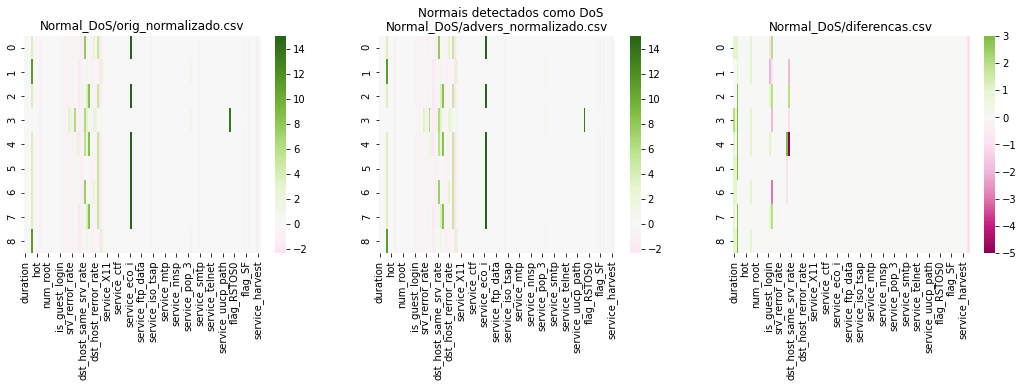

In [100]:
plotar_sequencia("Normais detectados como DoS",
                 "Normal_DoS/orig_normalizado.csv",
                 "Normal_DoS/advers_normalizado.csv",
                 "Normal_DoS/diferencas.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

[Text(0.5, 1.0, 'Total de Diferenças')]

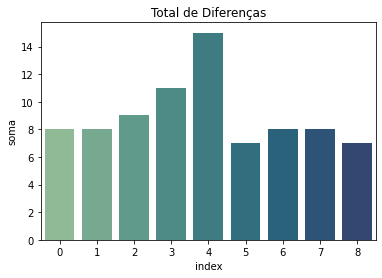

In [101]:
df = pd.read_csv("Normal_DoS/diferencas.csv")
df = df[df.columns].apply(abs)
df["soma"] = df[df.columns].sum(axis=1)

sns.barplot(x="index", y="soma", data=df.reset_index(), palette = 'crest').set(title="Total de Diferenças")

Calculos uma média da soma das diferenças:

In [102]:
df["soma"].mean()

9.016666704618437

Separo as amostras mais diferentes que a média.

In [103]:
acima_media = df["soma"] >  df["soma"].mean()
df_acima_media = df[acima_media]
df_acima_media = df_acima_media.drop(["soma"], axis=1)
df_acima_media

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_http_8001,service_http_2784,service_urh_i,service_aol,service_harvest,service_red_i,y_actual,y_pred
3,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.819161e-11,2.713608e-10,1.223965e-11,2.386580e-11,1.445347e-11,7.401246e-11,2.929251e-11,0.0,1.0,4.801629e-11,1.149801e-10,1.901483e-10,1.621395e-11,3.724720e-10,5.304773e-11,1.670696e-10,7.492873e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.388132e-21,0.0,0.0,1.355253e-20,0.000000e+00,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.000007e-03,7.585988e-10,5.000001e-03,2.951125e-11,1.277576e-09,2.259656e-10,8.918000e-11,3.0,5.0,9.226176e-10,4.921041e-11,5.652556e-11,2.336292e-11,4.235617e-11,7.364666e-10,3.617340e-10,4.211463e-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.469447e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.388132e-21,0.0,0.0,1.355253e-20,8.673617e-19,0.0,8.673617e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [104]:
lista_amostras = df_acima_media.index.values.tolist()

lista_amostras

for n_amostra in lista_amostras:
    amostra = df_acima_media.loc[[n_amostra]].transpose()
    amostra = amostra.sort_values(n_amostra, ascending=False)
    print(amostra.head())

                      3
dst_bytes           3.0
duration            2.0
srv_count           2.0
dst_host_srv_count  1.0
num_compromised     1.0
                      4
dst_host_srv_count  5.0
dst_bytes           3.0
dst_host_count      3.0
duration            1.0
num_compromised     1.0


<h2>Probe detectados como Normais</h2>

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

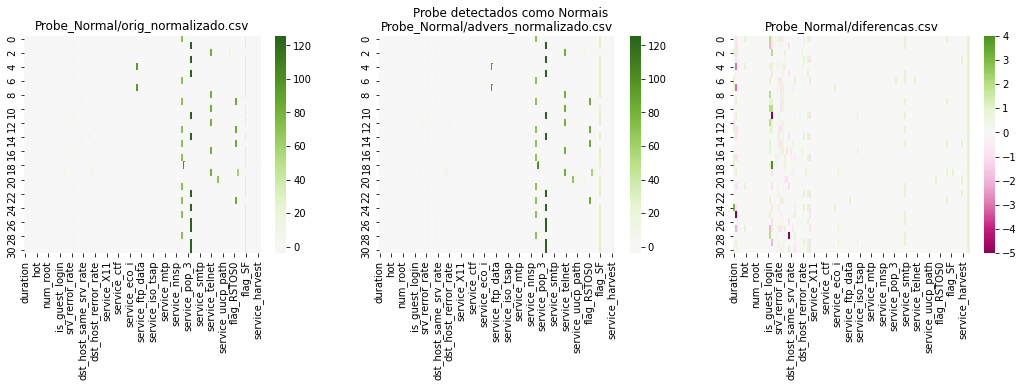

In [105]:
plotar_sequencia("Probe detectados como Normais",
                 "Probe_Normal/orig_normalizado.csv",
                 "Probe_Normal/advers_normalizado.csv",
                 "Probe_Normal/diferencas.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

[Text(0.5, 1.0, 'Total de Diferenças')]

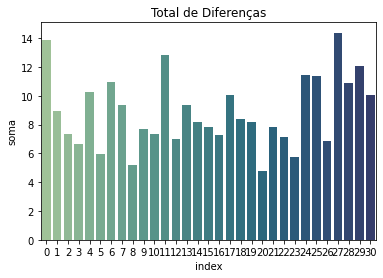

In [106]:
df = pd.read_csv("Probe_Normal/diferencas.csv")
df = df[df.columns].apply(abs)
df["soma"] = df[df.columns].sum(axis=1)

sns.barplot(x="index", y="soma", data=df.reset_index(), palette = 'crest').set(title="Total de Diferenças")

Calculos uma média da soma das diferenças:

In [107]:
df["soma"].mean()

8.88532393599132

Separo as amostras mais diferentes que a média.

In [108]:
acima_media = df["soma"] >  df["soma"].mean()
df_acima_media = df[acima_media]
df_acima_media = df_acima_media.drop(["soma"], axis=1)
df_acima_media

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_http_8001,service_http_2784,service_urh_i,service_aol,service_harvest,service_red_i,y_actual,y_pred
0,5.684342e-14,1.0,3.637979e-12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.870092e-10,6.000001e-02,5.500001e-01,9.250000e-01,7.750000e-01,7.500000e-01,3.921160e-11,0.0,0.0,2.191898e-09,1.750000e-01,2.534581e-08,1.835060e-08,9.500067e-02,8.847852e-09,1.253536e-09,5.750000e-01,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.421011e-20,0.0,0.0,0.0,0.0,0.0,0.0,2.168404e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,5.684342e-14,1.0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,9.546675e-09,1.031118e-08,5.678460e-10,2.900000e-01,1.350000e-01,7.500006e-02,1.566081e-11,0.0,1.0,2.067182e-08,4.161058e-09,7.500012e-02,3.242891e-11,2.500001e-02,3.843296e-09,9.500000e-02,2.500000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.421011e-20,0.0,0.0,0.0,0.0,0.0,0.0,2.168404e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.000000e+00,3.0,0.000000e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.903362e-11,2.133592e-09,9.350000e-01,2.500000e-01,4.398383e-10,7.450000e-01,7.700014e-01,0.0,0.0,7.000002e-02,1.550000e-01,1.275396e-08,1.627544e-10,2.007872e-11,7.002634e-09,2.250000e-01,9.500000e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.421011e-20,0.0,0.0,0.0,0.0,0.0,0.0,2.168404e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
6,1.000000e+00,0.0,3.637979e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.000000e-03,2.731149e-10,3.750000e-01,8.950000e-01,9.150009e-01,1.80

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [109]:
lista_amostras = df_acima_media.index.values.tolist()

lista_amostras

for n_amostra in lista_amostras:
    amostra = df_acima_media.loc[[n_amostra]].transpose()
    amostra = amostra.sort_values(n_amostra, ascending=False)
    print(amostra.head())

                0
count         2.0
y_pred        1.0
srv_count     1.0
flag_S2       1.0
service_smtp  1.0
                1
count         2.0
y_pred        1.0
service_smtp  1.0
src_bytes     1.0
srv_count     1.0
             4
src_bytes  3.0
y_pred     1.0
hot        1.0
srv_count  1.0
count      1.0
                   6
duration         1.0
count            1.0
service_systat   1.0
service_smtp     1.0
service_printer  1.0
                   7
src_bytes      3.000
duration       1.000
service_echo   1.000
y_pred         1.000
same_srv_rate  0.925
                11
srv_count      5.0
y_pred         1.0
service_smtp   1.0
service_imap4  1.0
src_bytes      1.0
               13
duration      1.0
count         1.0
service_smtp  1.0
src_bytes     1.0
srv_count     1.0
                    17
duration           1.0
protocol_type_tcp  1.0
src_bytes          1.0
protocol_type_udp  1.0
y_pred             1.0
                    24
duration           3.0
srv_count          1.0
src_bytes    

<h2>Normais detectados como Probe</h2>

Coloco em gráficos lado a lado a amostra original, a amostra alterada e as diferenças.

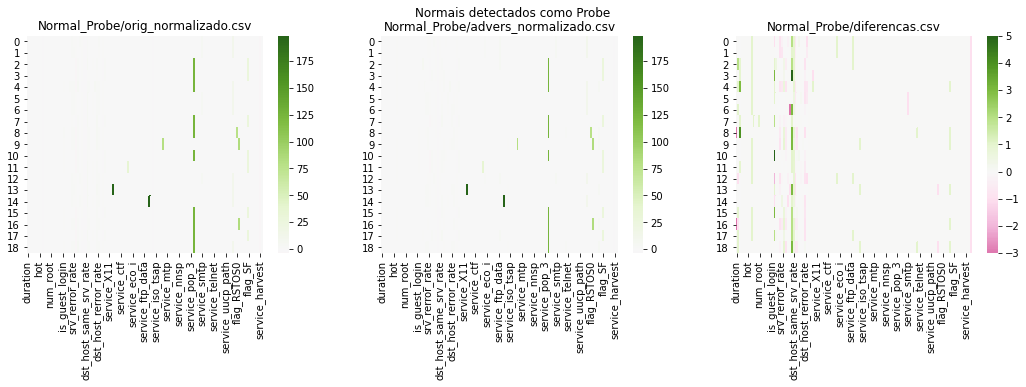

In [110]:
plotar_sequencia("Normais detectados como Probe",
                 "Normal_Probe/orig_normalizado.csv",
                 "Normal_Probe/advers_normalizado.csv",
                 "Normal_Probe/diferencas.csv")

Somo todas as diferenças em uma coluna só e coloco em um gráfico de barras, podemos ver as amostras mais diferentes.

[Text(0.5, 1.0, 'Total de Diferenças')]

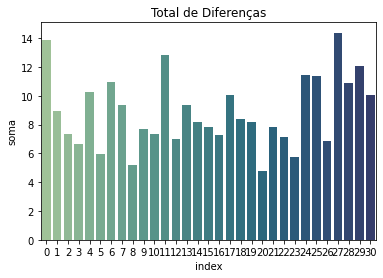

In [111]:
df = pd.read_csv("Probe_Normal/diferencas.csv")
df = df[df.columns].apply(abs)
df["soma"] = df[df.columns].sum(axis=1)

sns.barplot(x="index", y="soma", data=df.reset_index(), palette = 'crest').set(title="Total de Diferenças")

Calculos uma média da soma das diferenças:

In [112]:
df["soma"].mean()

8.88532393599132

Separo as amostras mais diferentes que a média.

In [113]:
acima_media = df["soma"] >  df["soma"].mean()
df_acima_media = df[acima_media]
df_acima_media = df_acima_media.drop(["soma"], axis=1)
df_acima_media

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_http_8001,service_http_2784,service_urh_i,service_aol,service_harvest,service_red_i,y_actual,y_pred
0,5.684342e-14,1.0,3.637979e-12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.870092e-10,6.000001e-02,5.500001e-01,9.250000e-01,7.750000e-01,7.500000e-01,3.921160e-11,0.0,0.0,2.191898e-09,1.750000e-01,2.534581e-08,1.835060e-08,9.500067e-02,8.847852e-09,1.253536e-09,5.750000e-01,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.421011e-20,0.0,0.0,0.0,0.0,0.0,0.0,2.168404e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,5.684342e-14,1.0,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,9.546675e-09,1.031118e-08,5.678460e-10,2.900000e-01,1.350000e-01,7.500006e-02,1.566081e-11,0.0,1.0,2.067182e-08,4.161058e-09,7.500012e-02,3.242891e-11,2.500001e-02,3.843296e-09,9.500000e-02,2.500000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.421011e-20,0.0,0.0,0.0,0.0,0.0,0.0,2.168404e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.000000e+00,3.0,0.000000e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.903362e-11,2.133592e-09,9.350000e-01,2.500000e-01,4.398383e-10,7.450000e-01,7.700014e-01,0.0,0.0,7.000002e-02,1.550000e-01,1.275396e-08,1.627544e-10,2.007872e-11,7.002634e-09,2.250000e-01,9.500000e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.421011e-20,0.0,0.0,0.0,0.0,0.0,0.0,2.168404e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
6,1.000000e+00,0.0,3.637979e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.000000e-03,2.731149e-10,3.750000e-01,8.950000e-01,9.150009e-01,1.80

Abro cada amostra em detalhes, mostrando os paramêtros com maiores diferenças.

In [114]:
lista_amostras = df_acima_media.index.values.tolist()

lista_amostras

for n_amostra in lista_amostras:
    amostra = df_acima_media.loc[[n_amostra]].transpose()
    amostra = amostra.sort_values(n_amostra, ascending=False)
    print(amostra.head())

                0
count         2.0
y_pred        1.0
srv_count     1.0
flag_S2       1.0
service_smtp  1.0
                1
count         2.0
y_pred        1.0
service_smtp  1.0
src_bytes     1.0
srv_count     1.0
             4
src_bytes  3.0
y_pred     1.0
hot        1.0
srv_count  1.0
count      1.0
                   6
duration         1.0
count            1.0
service_systat   1.0
service_smtp     1.0
service_printer  1.0
                   7
src_bytes      3.000
duration       1.000
service_echo   1.000
y_pred         1.000
same_srv_rate  0.925
                11
srv_count      5.0
y_pred         1.0
service_smtp   1.0
service_imap4  1.0
src_bytes      1.0
               13
duration      1.0
count         1.0
service_smtp  1.0
src_bytes     1.0
srv_count     1.0
                    17
duration           1.0
protocol_type_tcp  1.0
src_bytes          1.0
protocol_type_udp  1.0
y_pred             1.0
                    24
duration           3.0
srv_count          1.0
src_bytes    